In [1]:
import numpy as np
import matplotlib.pyplot as plt

import axion_motion
import transport_equation
from common import cosmology

In [2]:
# 5min 13s

In [18]:
T_eqs = [transport_equation.eqi_temp(alpha, plot=False) for alpha in range(transport_equation.N_alpha)]

In [19]:
%%time
T_osc = 1e13
T_dec = 1e11
T_end = min(min(T_eqs), max(T_osc, T_dec))

m_a = 2 * cosmology.calc_hubble_parameter(cosmology.calc_radiation_energy_density(T_osc))
decay_rate = cosmology.calc_hubble_parameter(cosmology.calc_radiation_energy_density(T_dec))
res = transport_equation.solve_transport_eq(1e15, transport_equation.source_vector_weak_sphaleron, axion_motion.axion_rhs_simple, 
                                            axion_motion.calc_d2Vdtheta2_simple, decay_rate, (m_a,), (1.0, 0.0), 
                                            T_end=T_end, num_steps=None, rtol=1e-3)

CPU times: user 301 ms, sys: 15.9 ms, total: 317 ms
Wall time: 660 ms


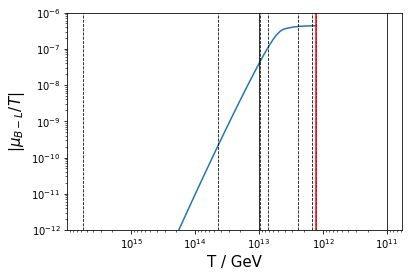

In [20]:
plt.loglog(res.T, np.abs(res.red_chem_B_minus_L))
plt.ylim(1e-12, 1e-6)
plt.gca().invert_xaxis()
plt.xlabel("T / GeV", fontsize=15)
plt.ylabel(r"$|\mu_{B - L} / T|$", fontsize=15)
plt.axvline(T_osc, color="black", lw=0.8)
plt.axvline(T_dec, color="black", lw=0.8)
for T in T_eqs: plt.axvline(T, ls="--", color="black", lw=.8)
plt.axvline(T_end, color="red")

In [16]:
len(res.T)

12645

Text(0, 0.5, '$\\dot{\\theta} / T$')

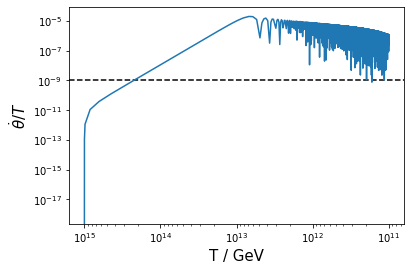

In [5]:
plt.axhline(1e-9, color="black", ls="--")
plt.loglog(res.T, np.abs(res.axion[1] / res.T))
plt.gca().invert_xaxis()
plt.xlabel("T / GeV", fontsize=15)
plt.ylabel(r"$\dot{\theta} / T$", fontsize=15)